In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
plt.style.use('bmh')

import plots
plots.plot_width = 10

# plots to draw in do_plots_all()
all_plots = ['select_real', 'store_real',
             'obj_select_real', 'obj_last_insert_real',
             'obj_insert_real', 'obj_store',
             'src_select_real', 'src_insert_real',
             'fsrc_select_real', 'fsrc_insert_real']
whiskers = 4.


# Test with Cassandra on GCP with 6-node cluster

JIRA ticket: https://jira.lsstcorp.org/browse/DM-28154

Setup is similar to DM-28136 but with 6 server nodes



In [2]:
data_files = [
    "data/DM-28154/apdb-gcp-2-20201223T005008.csv.gz",
    "data/DM-28154/apdb-gcp-2-20201223T011504.csv.gz",
    "data/DM-28154/apdb-gcp-2-20201223T030820.csv.gz",
    "data/DM-28154/apdb-gcp-2-20201223T031909.csv.gz",
    "data/DM-28154/apdb-gcp-2-20201224T043408.csv.gz",
#    "data/DM-28154/apdb-gcp-2-20201224T232830.csv.gz",
]

In [3]:
frames = [plots._read_csv(file, filter_count=False)[0] for file in data_files]

In [4]:
df_cass = pd.concat(frames)
del frames
# strip visits that did not measure read time
df_cass = df_cass[(df_cass.index % 1000) < 100]

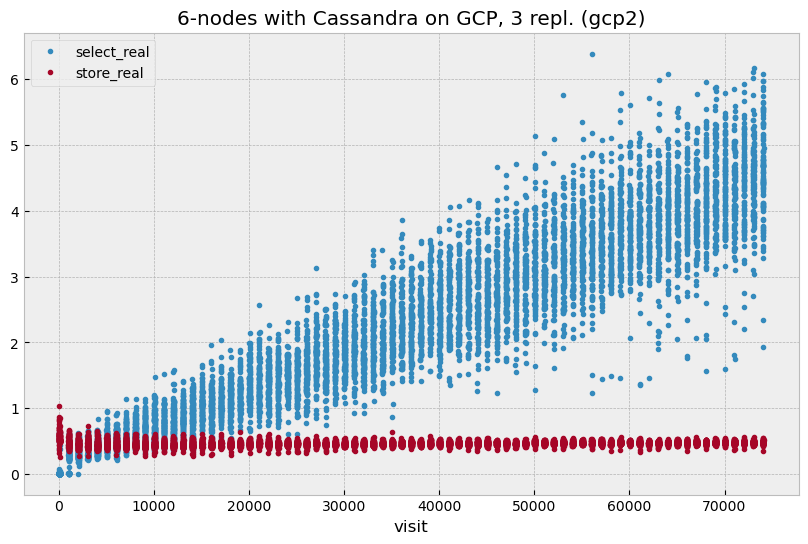

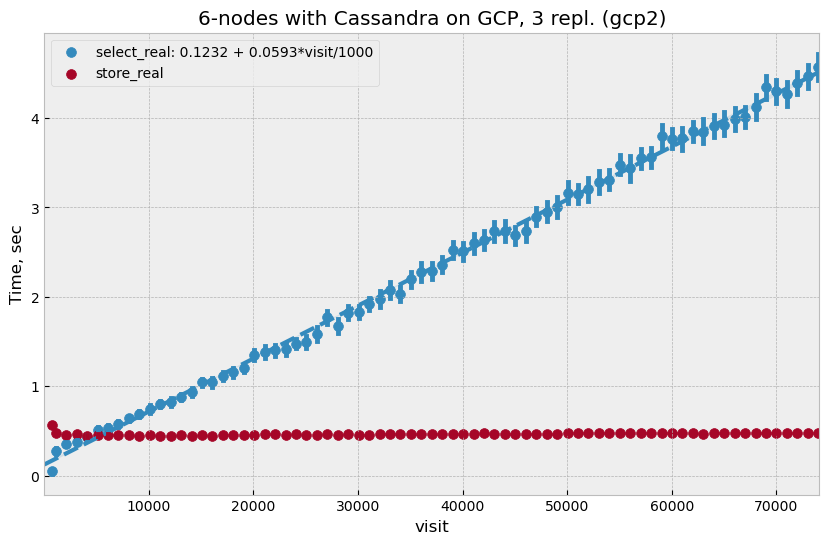

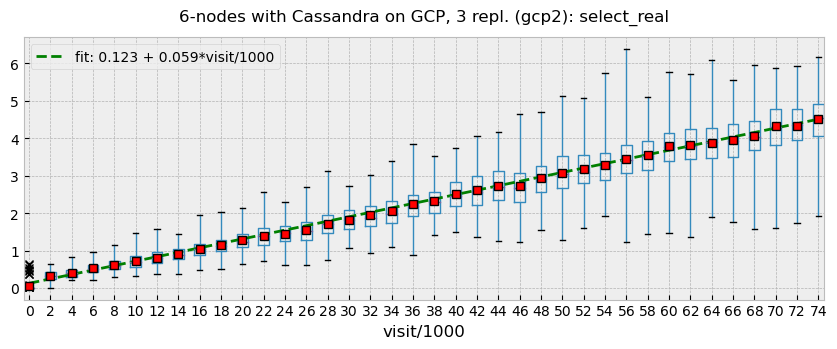

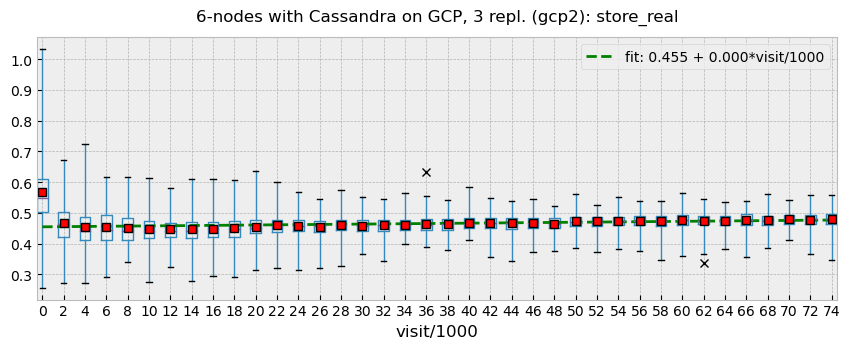

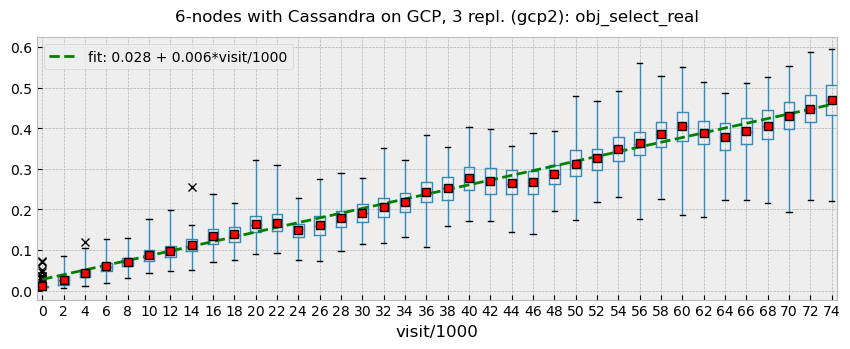

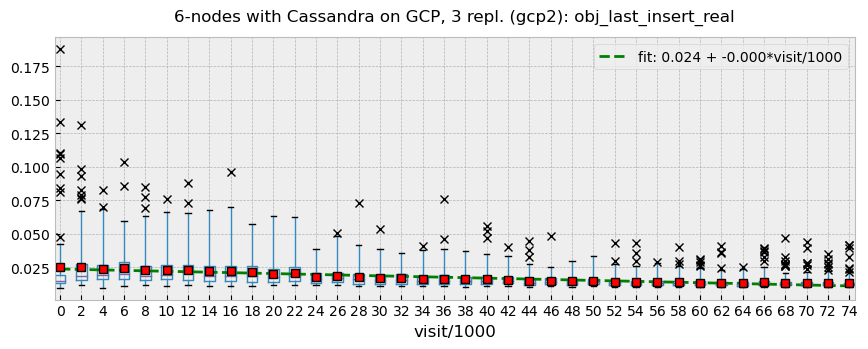

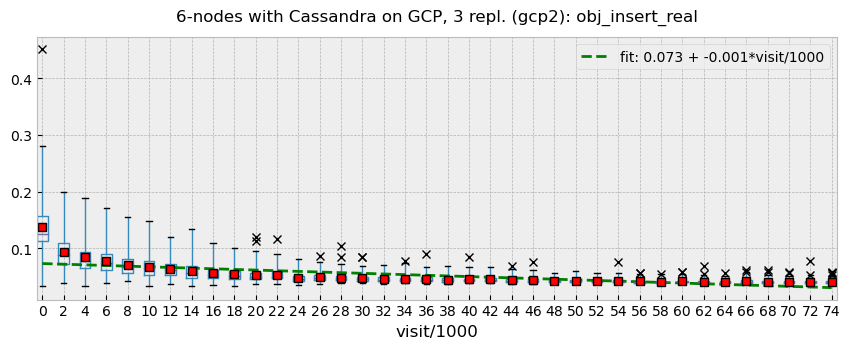

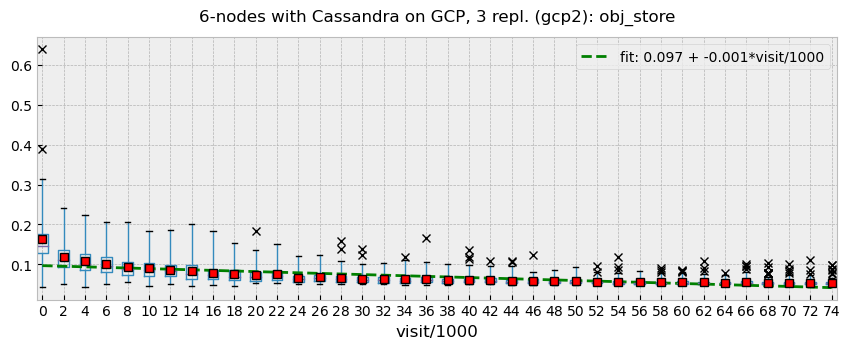

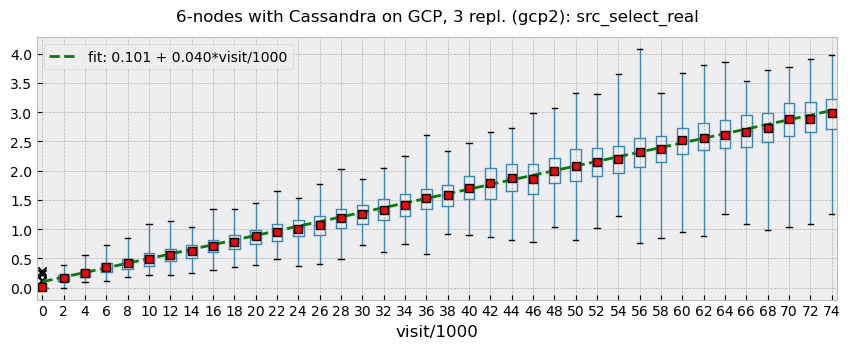

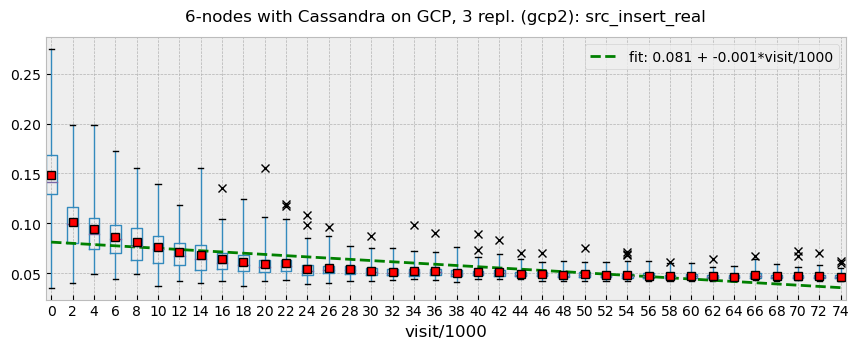

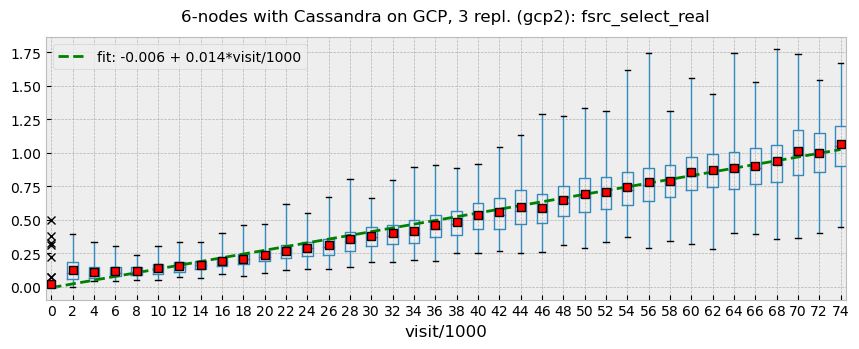

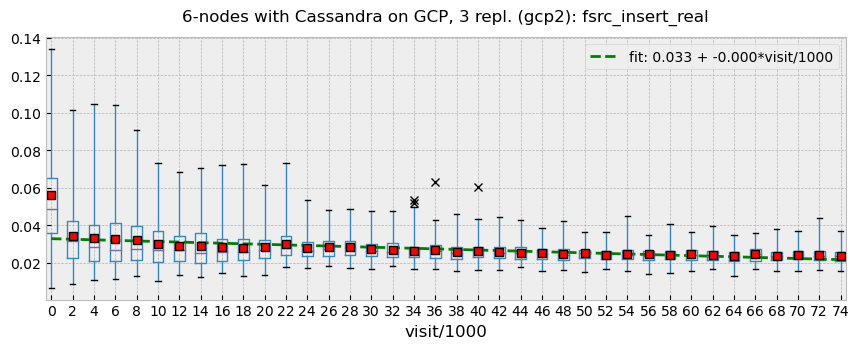

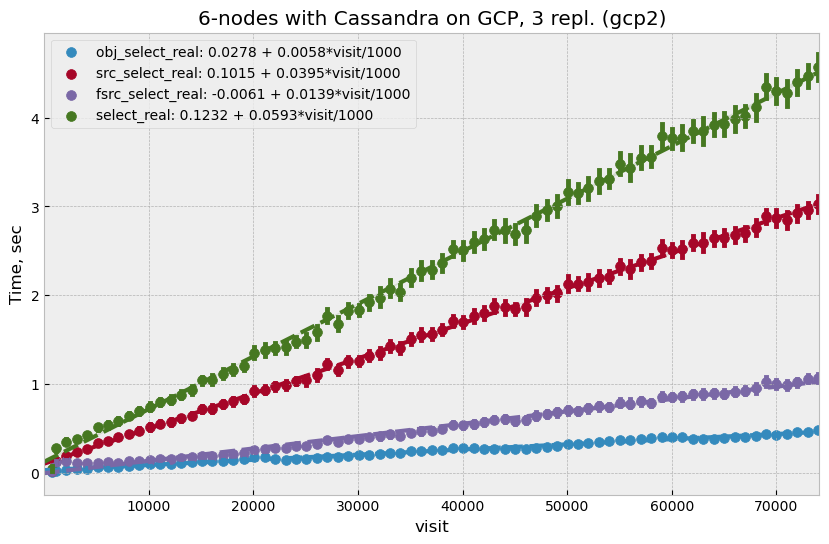

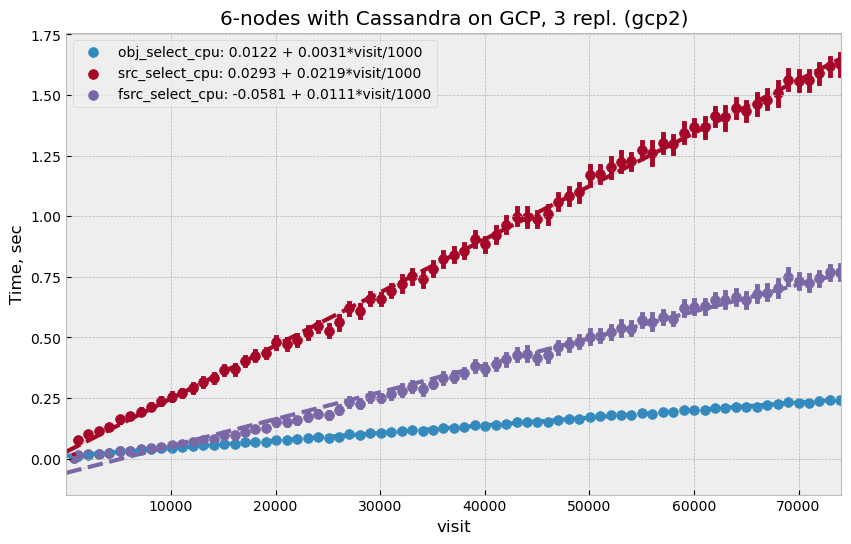

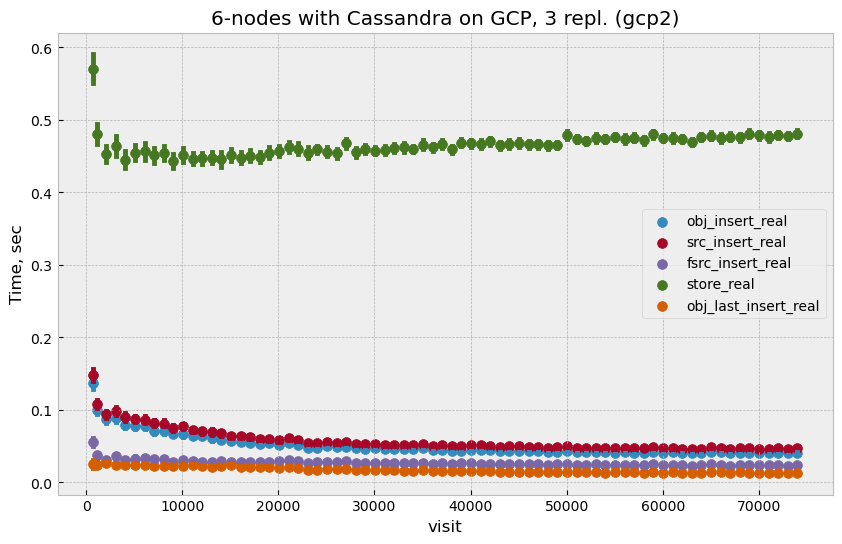

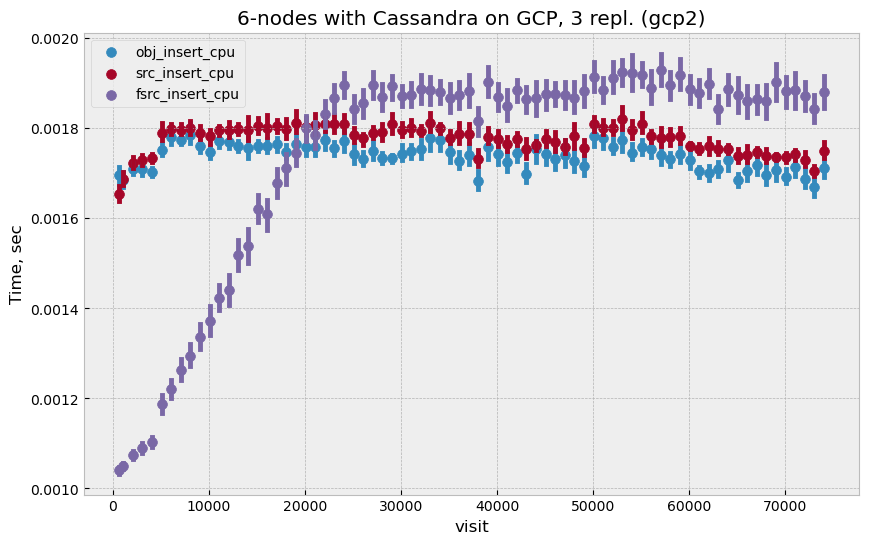

In [5]:
fit_modes = dict(
    store_real=None,
    obj_last_insert_real=None,
    src_insert_real=None,
    fsrc_insert_real=None,
    obj_insert_real=None,
    src_insert_cpu=None,
    fsrc_insert_cpu=None,
    obj_insert_cpu=None,
    store_cpu=None,
)

title = "6-nodes with Cassandra on GCP, 3 repl. (gcp2)"
plots.do_plots_all(df_cass, title, bin=2000, plots=all_plots, whis=whiskers, fit_modes=fit_modes, fit_nbins=75);

## Re-run with pandas

To reduce CPU time on client side I now use pandas as both input and output.

In [6]:
data_files = [
    "data/DM-28154/apdb-gcp-3-20201230T015055.csv.gz",
    "data/DM-28154/apdb-gcp-3-20201230T090938.csv.gz",
    "data/DM-28154/apdb-gcp-3-20201230T211115.csv.gz",
    "data/DM-28154/apdb-gcp-3-20210101T062735.csv.gz",
]

In [7]:
frames = [plots._read_csv(file, filter_count=False)[0] for file in data_files]

In [8]:
df_cass = pd.concat(frames)
del frames
# strip visits that did not measure read time
df_cass = df_cass[(df_cass.index % 1000) < 100]

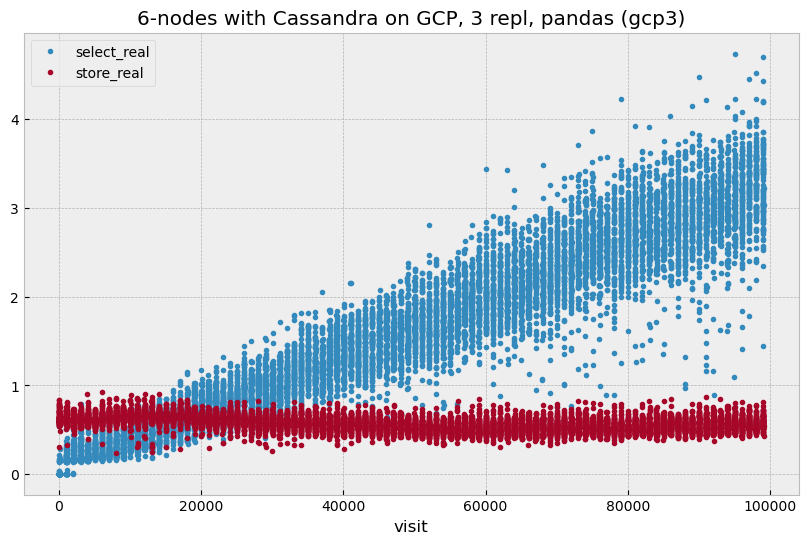

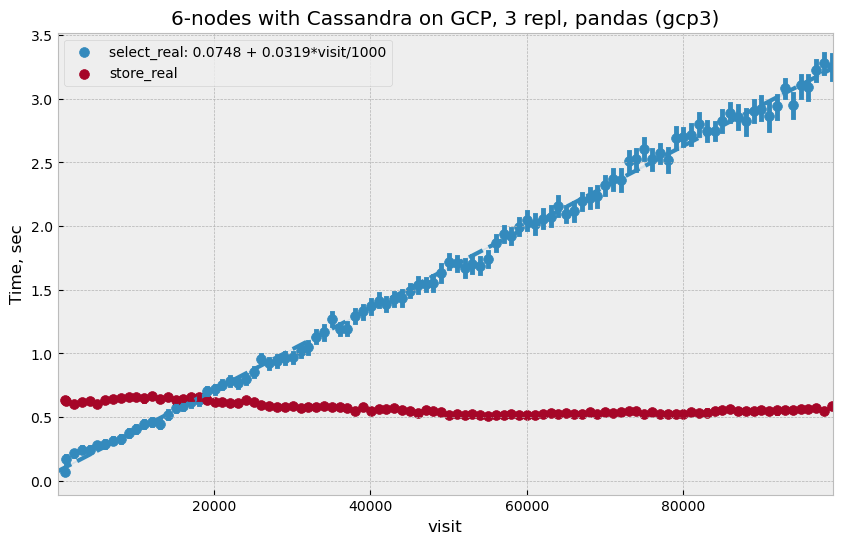

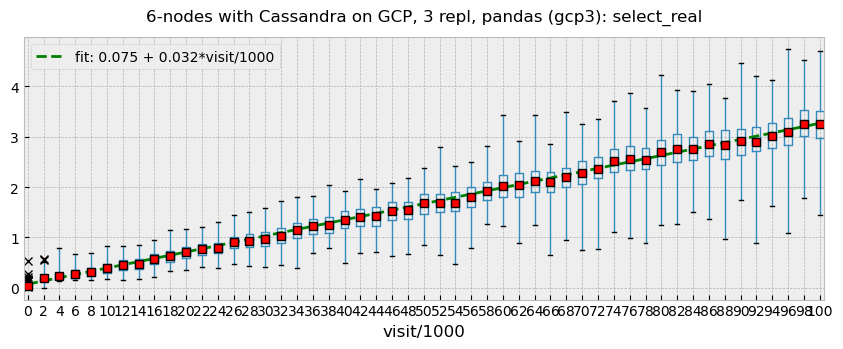

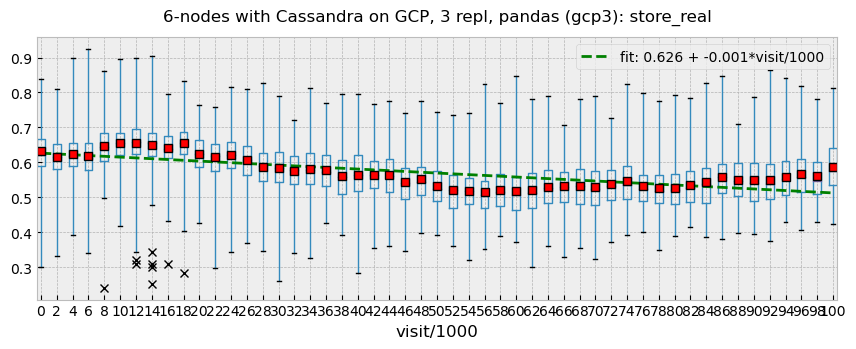

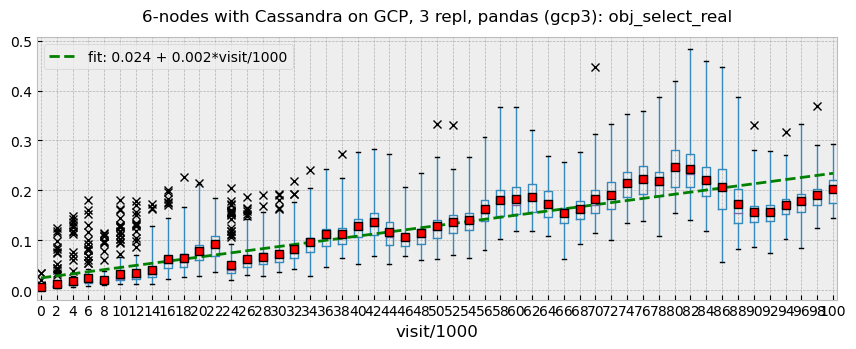

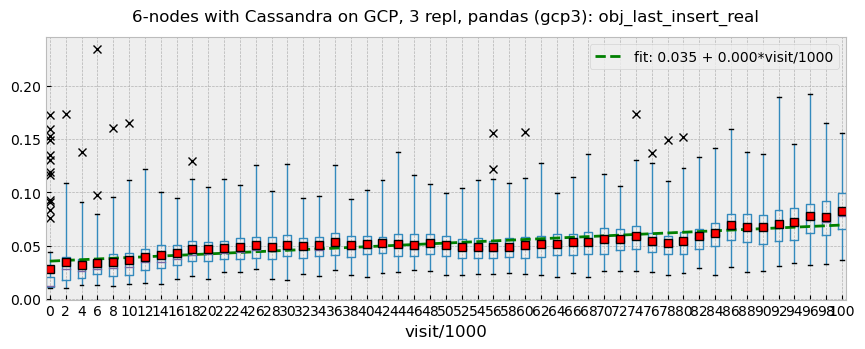

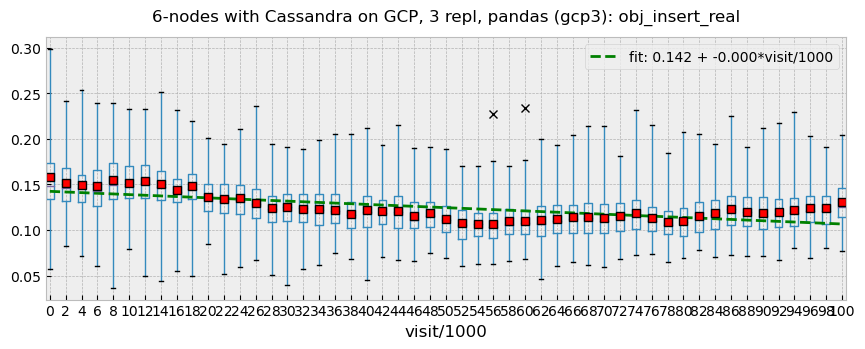

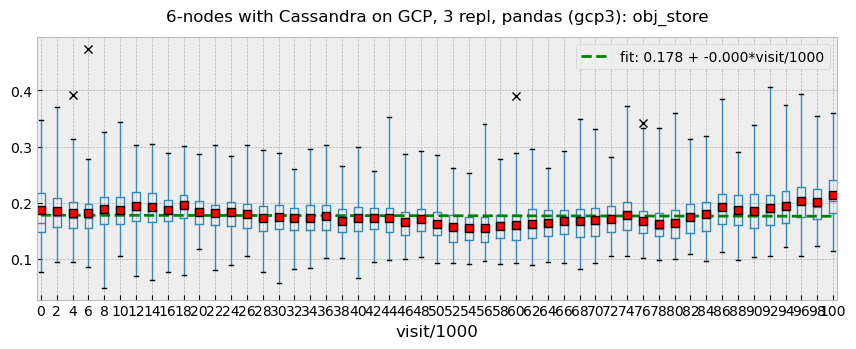

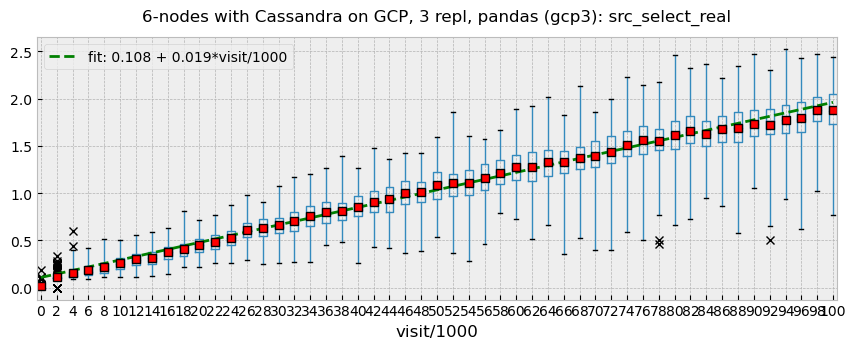

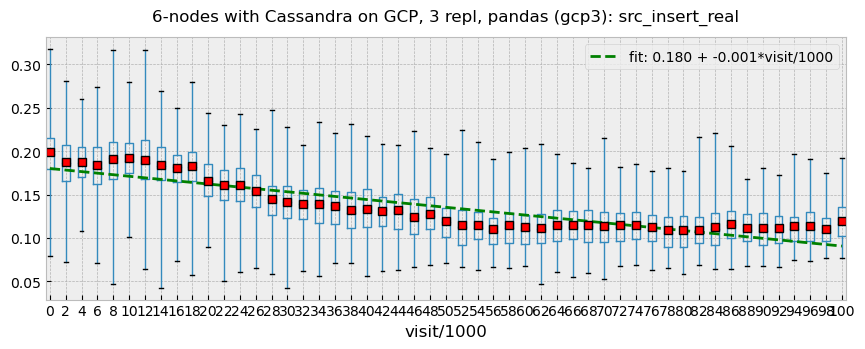

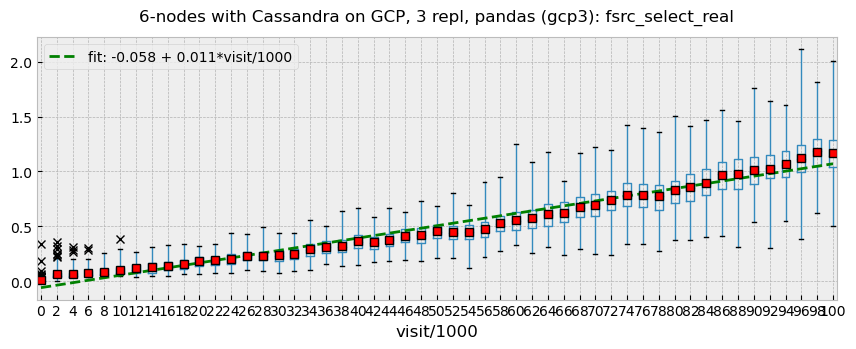

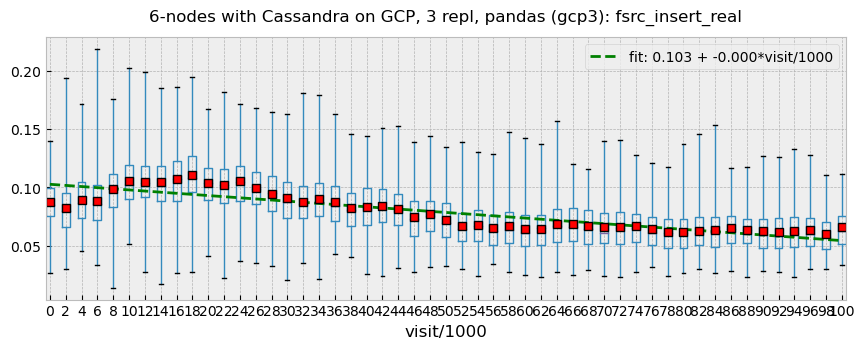

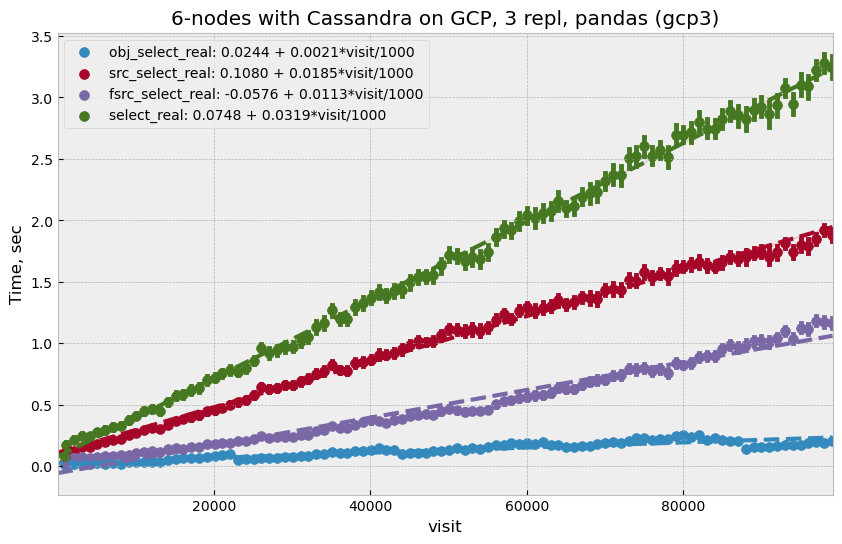

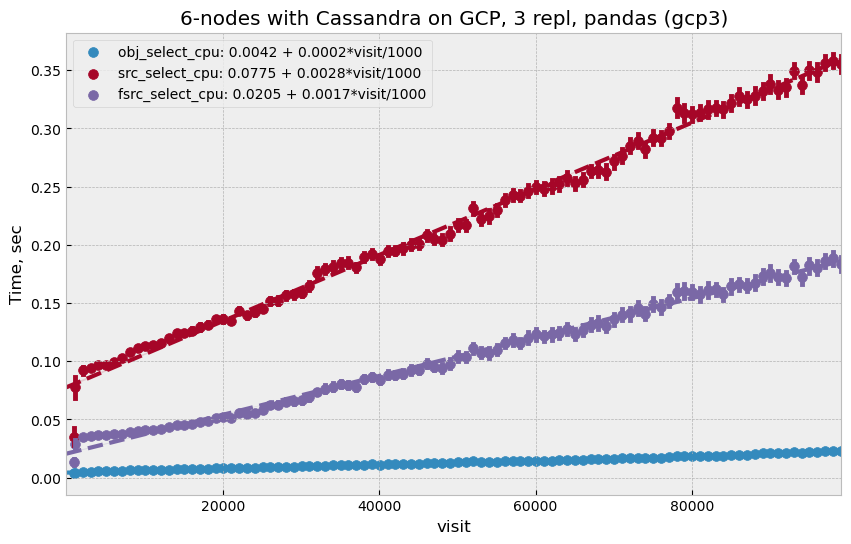

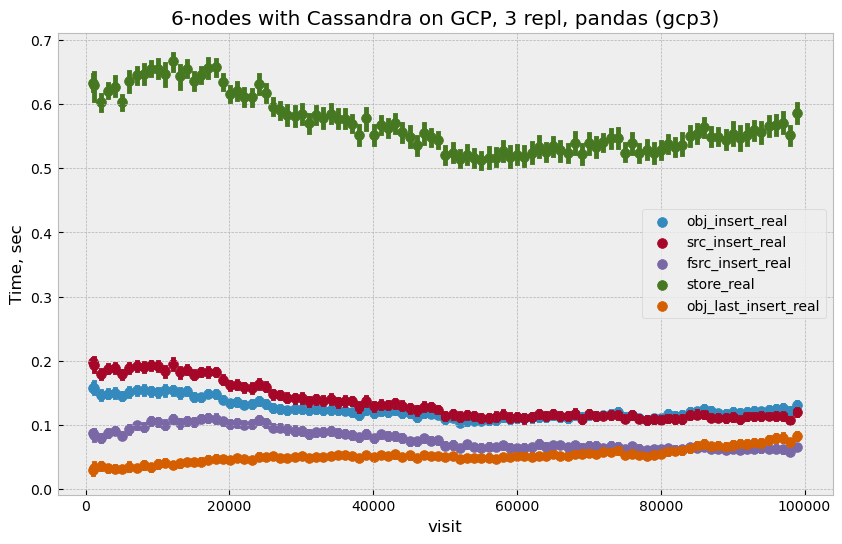

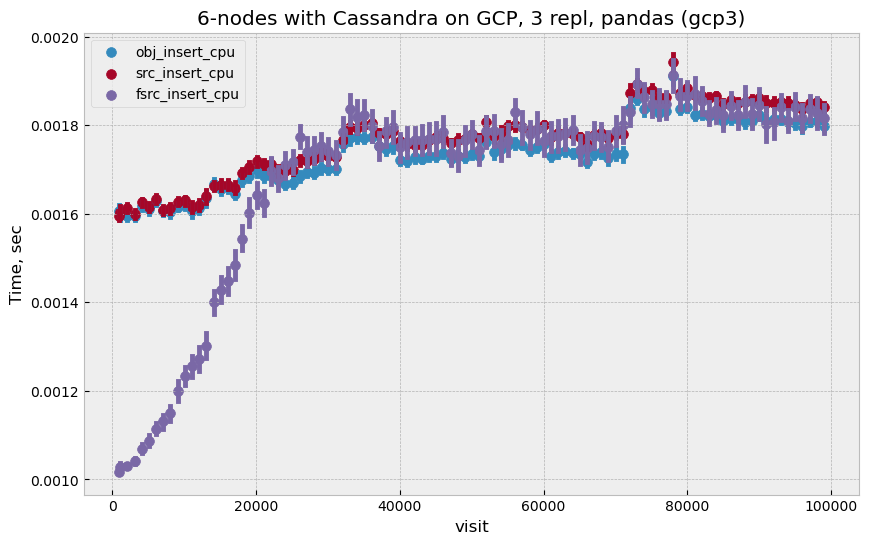

In [11]:
title = "6-nodes with Cassandra on GCP, 3 repl, pandas (gcp3)"
plots.do_plots_all(df_cass, title, bin=2000, plots=all_plots, whis=whiskers, fit_modes=fit_modes, fit_nbins=100);